#IRIS DATASET

In [74]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
iris=pd.read_csv('/content/iris_data.csv')
print(iris.head())
x=iris.drop(['Id','Species'],axis=1)
y=iris['Species']
x

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
st=StandardScaler().fit_transform(x)
pca=PCA(n_components=2)
prin_comp=pca.fit_transform(st)
prin_df=pd.DataFrame(data=prin_comp,columns=['PC1','PC2'])
prin_df

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


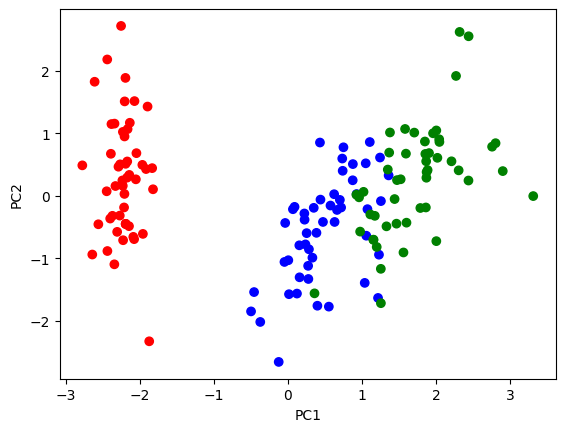

In [76]:
y1=np.array(y).flatten();
for i in range(len(y)):
  if y1[i]=='Iris-setosa':
    y1[i]=0
  elif y1[i]=='Iris-versicolor':
    y1[i]=1
  else:
    y1[i]=2
colors=['red','blue','green']
plt.scatter(np.array(prin_df['PC1']).flatten(),np.array(prin_df['PC2']).flatten(),c=y1,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.svm import SVC
clf=SVC()
Y_train=np.array(y_train)
Y_train=Y_train.flatten()
clf.fit(x_train,Y_train)
Y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,Y_pred))

0.9777777777777777


In [78]:
#AVG ACC OF IRIS DATASET USING SVC
IR_acc=[]
for i in range(1,11):
  _x_train,_x_test,_y_train,_y_test=train_test_split(x,y,test_size=0.3,random_state=i)
  clf=SVC()
  _Y_train=np.array(_y_train)
  _Y_train=_Y_train.flatten()
  clf.fit(x_train,Y_train)
  Y_pred=clf.predict(_x_test)
  _ir_clf=clf.fit(_x_train,_y_train)
  _y_pred=_ir_clf.predict(_x_test)
  IR_acc.append(accuracy_score(_y_test,_y_pred))
IR_avg_acc=np.sum(IR_acc)/len(IR_acc)
print(IR_avg_acc)

0.9644444444444444


# HEART DISEASE

In [79]:
hd=pd.read_csv('/content/H_DDataset.csv')
hd

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [80]:
hd_x=hd.drop(['target'],axis=1)
hd_y=hd['target']
hd_x

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
hd_st=StandardScaler().fit_transform(hd_x)
pca=PCA(n_components=2)
princ_comp=pca.fit_transform(hd_st)
princ_df=pd.DataFrame(data=princ_comp,columns=['HD_PC1','HD_PC2'])
princ_df

,HD_PC1,HD_PC2
0,-2.603235,-0.021697
1,-0.751117,0.849152
2,-1.529505,-0.409605
3,1.118272,0.273826
4,-0.751604,-0.609897
...,...,...
1185,-1.298599,-0.393227
1186,2.038180,0.031984
1187,1.701523,-0.999651
1188,-1.625701,1.778003


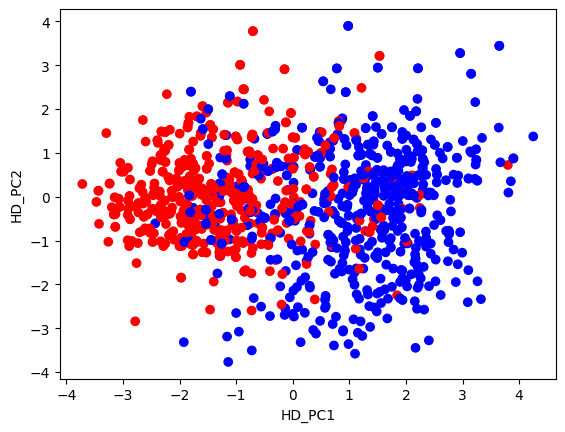

In [82]:
hd_y1=np.array(hd_y).flatten();
for i in range(len(hd_y)):
  if hd_y1[i]==0:
    hd_y1[i]=0
  else:
    hd_y1[i]=1
colors=['red','blue']
plt.scatter(np.array(princ_df['HD_PC1']).flatten(),np.array(princ_df['HD_PC2']).flatten(),c=hd_y1,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('HD_PC1')
plt.ylabel('HD_PC2')
plt.show()

In [83]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(hd_x,hd_y,test_size=0.3,random_state=3)
from sklearn.svm import SVC
clf=SVC()
Y1_train=np.array(y1_train)
Y1_train=Y1_train.flatten()
clf.fit(x1_train,Y1_train)
Y1_pred=clf.predict(x1_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y1_test,Y1_pred))

0.7058823529411765


#K-FOLD CROSS VALIDATION TECHNIQUE


In [84]:
#HEART DISEASE DATASET(SVC)
pred=hd_x
tar=hd_y
from sklearn.model_selection import KFold,cross_validate
clf1=SVC()
num_folds=20
kf=KFold(n_splits=num_folds,shuffle=False)
res=cross_validate(clf1,pred,tar,cv=kf)
print(res['test_score'])
print(sum(res['test_score'])/num_folds)

[0.63333333 0.65       0.71666667 0.65       0.73333333 0.88333333
 0.96666667 0.7        0.73333333 0.78333333 0.62711864 0.71186441
 0.66101695 0.69491525 0.72881356 0.6440678  0.62711864 0.72881356
 0.69491525 0.59322034]
0.7080932203389831


In [85]:
#IRIS DATASET(SVC)
ir_pred=x
ir_tar=y
ir_clf=SVC()
num_folds=20
kf=KFold(n_splits=num_folds,shuffle=False)
ir_res=cross_validate(ir_clf,ir_pred,ir_tar,cv=kf)
print(ir_res['test_score'])
print(sum(ir_res['test_score'])/num_folds)

[1.         1.         1.         1.         1.         1.
 1.         1.         0.875      0.75       0.85714286 1.
 1.         0.85714286 1.         1.         0.85714286 0.85714286
 0.85714286 1.        ]
0.9455357142857144


In [86]:
#KNN ALGO(IRIS)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(ir_pred,ir_tar)
num_folds=20
kf_knn=KFold(n_splits=num_folds,shuffle=False)
kn_res=cross_validate(knn,ir_pred,ir_tar,cv=kf_knn)
print(kn_res['test_score'])
print(sum(kn_res['test_score'])/num_folds)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.875      0.85714286 1.
 1.         0.85714286 1.         1.         0.57142857 0.85714286
 0.85714286 1.        ]
0.9437500000000002


In [87]:
#DT ALGO(IRIS)
from sklearn import tree
clf_dt=tree.DecisionTreeClassifier(criterion='entropy',splitter='best')
clf_dt.fit(ir_pred,ir_tar)
num_folds=20
kf_dt=KFold(n_splits=num_folds,shuffle=False)
dt_res=cross_validate(clf_dt,ir_pred,ir_tar,cv=kf_dt)
print(dt_res['test_score'])
print(sum(dt_res['test_score'])/num_folds)

[1.         1.         1.         1.         1.         1.
 1.         0.875      0.875      0.625      0.85714286 1.
 1.         0.85714286 1.         0.85714286 1.         0.57142857
 1.         1.        ]
0.9258928571428573


In [88]:
#NAIVE BAYE'S ALGO(IRIS)
from sklearn.naive_bayes import GaussianNB
gclf=GaussianNB()
nb_clf=gclf.fit(ir_pred,ir_tar)
num_folds=20
kf_nb=KFold(n_splits=num_folds,shuffle=False)
nb_res=cross_validate(nb_clf,ir_pred,ir_tar,cv=kf_nb)
print(nb_res['test_score'])
print(sum(nb_res['test_score'])/num_folds)

[1.         1.         1.         1.         1.         1.
 0.875      1.         0.875      0.875      1.         1.
 1.         0.85714286 1.         0.85714286 1.         0.71428571
 1.         1.        ]
0.9526785714285715
